In [1]:
# The main idea of this notebook is to try different machine learning algorithms on data

In [2]:
# importing libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly.graph_objs as go
%matplotlib inline

In [3]:
# reading data

df = pd.read_csv('PreprocessedData.csv',na_values = ['Nan','',"n/a", "na", "--"])

In [4]:
df.head()

,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_Tenure_0-12,tenure_group_Tenure_12-24,tenure_group_Tenure_24-48,tenure_group_Tenure_48-60,tenure_group_Tenure_gt_60,no_of_services
0,29.85,29.85,0,1,0,1,0,0,1,1,...,0,0,1,0,1,0,0,0,0,1
1,56.95,1889.50,0,0,1,1,0,1,0,1,...,0,0,0,1,0,0,1,0,0,3
2,53.85,108.15,1,0,1,1,0,1,0,1,...,0,0,0,1,1,0,0,0,0,3
3,42.30,1840.75,0,0,1,1,0,1,0,1,...,1,0,0,0,0,0,1,0,0,3
4,70.70,151.65,1,1,0,1,0,1,0,1,...,0,0,1,0,1,0,0,0,0,1


In [5]:
# In order to avoid inaccurate modeling results, the first step is to normalize no_of_services,monthly and total charges as they are in
# a different scale compared to other variables

In [6]:
# applying z score transformation
df[['MonthlyCharges','TotalCharges','no_of_services']] = df[['MonthlyCharges','TotalCharges','no_of_services']].transform(lambda x: (x - x.mean()) / x.std())

### 1. Logistic Regression Model

In [7]:
# importing libraries necessary to perform logistic regression

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [8]:
# First,assigned Churn as the target variable (y) and then remaining features to dataframe called X

y = df['Churn']
X = df.drop('Churn',axis =1)

In [9]:
# Splitted data into training and testing data in the ratio 70:30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [11]:
# Fitting the model
model = LogisticRegression()
Model1= model.fit(X_train, y_train)

In [12]:
# Predicting the results on test data
prediction = model.predict(X_test)

In [13]:
# To get the factors which played an important role in determining whether a customer will churn or not

weights = pd.Series(model.coef_[0],index=X.columns.values)
weights.sort_values(ascending = False)

tenure_group_Tenure_0-12                   0.805328
Contract_Month-to-month                    0.696039
InternetService_Fiber optic                0.402312
PaymentMethod_Electronic check             0.205046
MonthlyCharges                             0.147408
TechSupport_No                             0.128126
StreamingTV_Yes                            0.117263
OnlineSecurity_No                          0.097864
OnlineBackup_No                            0.070080
PhoneService_No                            0.048798
MultipleLines_No phone service             0.048798
StreamingMovies_Yes                        0.044606
PaperlessBilling_Yes                       0.034890
no_of_services                             0.031535
tenure_group_Tenure_12-24                  0.023858
Contract_One year                          0.005076
DeviceProtection_No                       -0.029496
SeniorCitizen_1                           -0.034848
PaymentMethod_Mailed check                -0.037020
MultipleLine

#### Evaluation of logistic regression model

In [15]:
print(classification_report(y_test, prediction))

             precision    recall  f1-score   support

          0       0.83      0.92      0.87      1546
          1       0.68      0.50      0.57       567

avg / total       0.79      0.80      0.79      2113



In [17]:
print(roc_auc_score(y_test, prediction))

0.705428014721


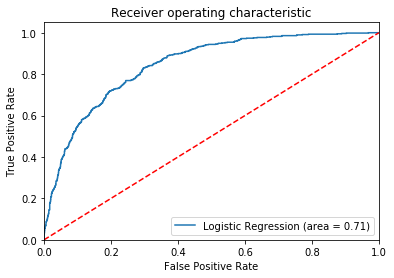

In [18]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, prediction)
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### 2. Support Vector Machines (SVM)

In [19]:
# importing libraries necessary for SVM
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [20]:
param_grid ={'C':[1] ,'gamma':[0.1],'kernel':['rbf']}
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

In [21]:
# Fitting the model 
grid.fit(X_train,y_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV]  C=1, gamma=0.1, kernel=rbf, score=0.8071776155717761, total=   1.2s
[CV] C=1, gamma=0.1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s


[CV]  C=1, gamma=0.1, kernel=rbf, score=0.7827145465611686, total=   0.9s
[CV] C=1, gamma=0.1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.5s remaining:    0.0s


[CV]  C=1, gamma=0.1, kernel=rbf, score=0.7973219720024346, total=   0.9s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    5.1s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [1], 'gamma': [0.1], 'kernel': ['rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [22]:
grid.best_params_

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}

In [23]:
grid.best_estimator_

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [26]:
grid_predictions = grid.predict(X_test)
grid_predictions[:5]

array([0, 0, 0, 0, 1], dtype=int64)

#### SVM Model evaluation

In [27]:
print(classification_report(y_test,grid_predictions))

             precision    recall  f1-score   support

          0       0.83      0.92      0.87      1546
          1       0.69      0.47      0.56       567

avg / total       0.79      0.80      0.79      2113



In [28]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test, grid_predictions))

0.696551492045


In [29]:
# Roc_auc_score is better for logistic regression model compared to SVM. 